In [1]:
import pandas as pd
import sqlite3
import os

In [3]:
DB_NAME = "sales_data.db"

In [5]:
conn = sqlite3.connect(DB_NAME)
cursor = conn.cursor()

In [7]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

In [9]:
sample_data = [
    ("Protein Powder", 10, 1200),
    ("Creatine", 25, 800),
    ("Shaker Bottle", 15, 300),
    ("Gym Gloves", 8, 450),
    ("Energy Drink", 20, 150)
]

In [11]:
cursor.execute("SELECT COUNT(1) FROM sales;")
count = cursor.fetchone()[0]

In [13]:
if count == 0:
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()
    inserted = True
else:
    inserted = False

In [15]:
df = pd.read_sql_query("SELECT * FROM sales ORDER BY id;", conn)

In [17]:
print("Database file path:", os.path.abspath(DB_NAME))
print("Rows inserted now?:", inserted)
print("\nCurrent contents of sales table (first 10 rows):")
print(df.head(10).to_string(index=False))

Database file path: C:\Users\SWARAJ\ElevateLabs_DataAnalytics_Internship\Task 7\sales_data.db
Rows inserted now?: True

Current contents of sales table (first 10 rows):
 id        product  quantity  price
  1 Protein Powder        10 1200.0
  2       Creatine        25  800.0
  3  Shaker Bottle        15  300.0
  4     Gym Gloves         8  450.0
  5   Energy Drink        20  150.0


In [19]:
query = """
SELECT
    product,
    SUM(quantity) as total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

In [21]:
df_summary = pd.read_sql_query(query, conn)

In [25]:
print("Sales Summary")
print(df_summary)

Sales Summary
          product  total_qty  revenue
0        Creatine         25  20000.0
1    Energy Drink         20   3000.0
2      Gym Gloves          8   3600.0
3  Protein Powder         10  12000.0
4   Shaker Bottle         15   4500.0


# revenue bar chart

In [27]:
import matplotlib.pyplot as plt

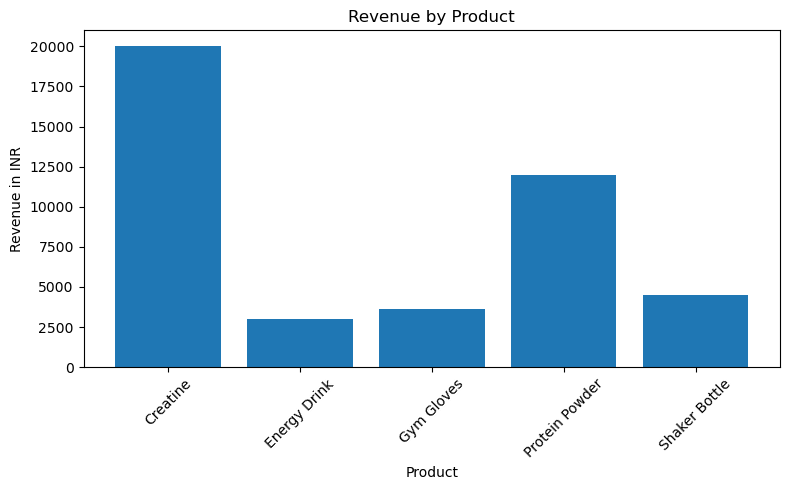

In [29]:
plt.figure(figsize=(8,5))
plt.bar(df_summary['product'],df_summary['revenue'])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue in INR")
plt.xticks(rotation=45)
plt.tight_layout()

In [33]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

# Top Selling Product Insight

In [39]:
top_product = df_summary.sort_values("revenue", ascending=False).iloc[0]

In [41]:
print("Top Selling Product")
print(f"Product: {top_product['product']}")
print(f"Total Revenue: ₹{top_product['revenue']}")

Top Selling Product
Product: Creatine
Total Revenue: ₹20000.0


# Revenue Pie Chart

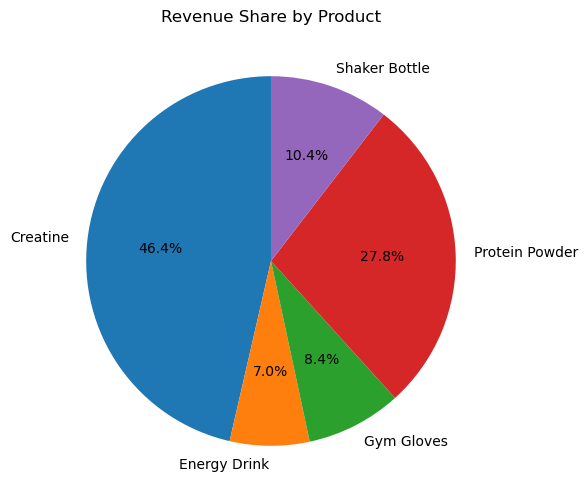

Pie chart saved as revenue_pie_chart.png


In [44]:
plt.figure(figsize=(6,6))
plt.pie(
    df_summary['revenue'],
    labels=df_summary['product'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Revenue Share by Product")
plt.savefig("revenue_pie_chart.png")
plt.show()

print("Pie chart saved as revenue_pie_chart.png")

In [46]:
df_summary.to_csv("sales_summary.csv", index=False)
print("Summary exported as sales_summary.csv")

Summary exported as sales_summary.csv
